In [150]:
import cdsapi
import xarray as xr
from urllib.request import urlopen
import numpy as np
import pandas as pd
from mpetools import get_info_islands, timeseries_environmental_remotesensing_wave_energy, timeseries_environmental_remotesensing_sea_level_anomaly
c = cdsapi.Client(url = "https://cds.climate.copernicus.eu/api/v2", key = "200721:d13b27b3-32f8-4315-a9c0-e65dc3eb6fdd")
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
from skimage import exposure
import matplotlib
import datetime
import cdstoolbox as ct

import ee

try:
    ee.Initialize()

except Exception as e:
    ee.Authenticate()
    ee.Initialize()

%reload_ext autoreload
%autoreload 2

In [197]:
from mpetools import timeseries_disasters_EMDAT

In [244]:
island = "Futuna"
country = 'Vanuatu'

island_info = timeseries_disasters_EMDAT.TimeSeriesDisasters(island, country).main()



-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Futuna, Vanuatu
-------------------------------------------------------------------

~ No file exists. Will run `pre_timeseries_steps.py`. ~


-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Futuna, Vanuatu
-------------------------------------------------------------------

~ All information will be extracted/calculated. ~

S2 132
L5 0
L7 11
L8 38
L9 7

-------------------------------------------------------------------
RETRIEVING DISASTERS (EM-DAT) DATA
Island: Futuna, Vanuatu
-------------------------------------------------------------------

~ Retrieving disaster data from EM-DAT database. ~
~ Retrieving time series as number of events per year. ~
~ Retrieving time series as confounder effects. ~


TypeError: 'in <string>' requires string as left operand, not bool

In [242]:
island_info['timeseries_disasters']['confounders'].plot()

{'general_info': {'island': 'Futuna',
  'country': 'Vanuatu',
  'part of': 'Vanuatu',
  'located in the administrative territorial entity': 'Tafea',
  'located in or next to body of water': 'Pacific Ocean',
  'elevation above sea level': '+636'},
 'spatial_reference': {'latitude': -19.52904465,
  'longitude': 170.21582864870504,
  'polygon': ee.Geometry({
    "functionInvocationValue": {
      "functionName": "GeometryConstructors.Polygon",
      "arguments": {
        "coordinates": {
          "constantValue": [
            [
              [
                170.1955458,
                -19.5086041
              ],
              [
                170.1955458,
                -19.5494911
              ],
              [
                170.238261,
                -19.5494911
              ],
              [
                170.238261,
                -19.5086041
              ],
              [
                170.1955458,
                -19.5086041
              ]
            ]
     

In [240]:
island_info['timeseries_disasters']['database']['Location']

433                                           Tongoa, Emae
456                                                  Efate
2568                                       Western Islands
2629                                                   NaN
2630                             Northern Isl., West Santo
2809                                                   NaN
2925                        Efate, Erromango, Tanna, Aniwa
3009                                                   NaN
3010             Torres, Banks Groups, West Espiritu Santo
3011                                                   NaN
4952                                                   NaN
4953                                             Port Vila
4954                                        Espiritu Santo
5184     Efate, Ambrym, Pentecost, Mataso, Epi, Vila, M...
5185                                      Efate, Port Vila
5282           Sherperd Isl., Southern Epi, Northern Efate
5315                                         Malakula Is

In [221]:
from mpetools import pre_timeseries_steps

In [222]:
island = 'Banaba'
country = 'Kiribati'

island_info = pre_timeseries_steps.PreTimeSeries(island, country, alt_name='Ocean Island').main()


-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Banaba, Kiribati
-------------------------------------------------------------------

~ All information will be extracted/calculated. ~

S2 44
L5 0
L7 11
L8 64
L9 16


In [191]:
from mpetools import get_info_islands

island_info = get_info_islands.retrieve_info_island('Fasmendhoo', 'Maldives')


-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Fasmendhoo, Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               part of
               located in the administrative territorial entity
               located in or next to body of water
spatial_reference
               latitude
               longitude
               polygon
               polygon_OSM
image_collection_dict
               description
               S2
               L5
               L7
               L8
               L9


In [196]:
', '.join([island_info['general_info'][kk] for kk in island_info['general_info'].keys()]).split(', ')

['Fasmendhoo',
 'Maldives',
 'Raa Atoll',
 'Raa Atoll',
 'Laccadive Sea',
 'Indian Ocean']

In [170]:
osm_type, osm_id = ox.geocode_to_gdf('Fasmendhoo, Maldives').osm_type.values[0], ox.geocode_to_gdf('Fasmendhoo, Maldives').osm_id.values[0]

In [171]:
osm_type, osm_id

('way', 19879687)

In [172]:
url = 'https://www.openstreetmap.org/{}/{}'.format(osm_type, str(osm_id))
web_url = urlopen(url)

In [173]:
ll = str(web_url.read())

In [174]:
import re
from wikidataintegrator import wdi_core, wdi_login

In [175]:
pattern = r'Q\d+'
matches = re.findall(pattern, ll)
np.unique(np.array(matches))

array(['Q2646131'], dtype='<U8')

In [176]:
wikidata_id = np.unique(np.array(matches))[0]  # Q42 represents Douglas Adams

# Fetch information about the Wikidata item
data = wdi_core.WDItemEngine(wd_item_id=wikidata_id)

In [177]:
data.get_wd_json_representation()

{'pageid': 2550778,
 'lastrevid': 1773638449,
 'modified': '2022-11-17T15:10:06Z',
 'labels': {'nl': {'language': 'nl', 'value': 'Fasmendhoo'},
  'en': {'language': 'en', 'value': 'Fasmendhoo'}},
 'descriptions': {'nl': {'language': 'nl', 'value': 'eiland van de Maldiven'},
  'en': {'language': 'en', 'value': 'island in Raa Atoll, Maldives'},
  'de': {'language': 'de', 'value': 'Insel der Malediven'},
  'ml': {'language': 'ml', 'value': 'മാലിദ്വീപിലെ ഒരു ദ്വീപ്'},
  'bn': {'language': 'bn', 'value': 'মালদ্বীপের একটি দ্বীপ'},
  'pap': {'language': 'pap', 'value': 'Isla'},
  'dv': {'language': 'dv', 'value': 'ދިވެހިރާއްޖޭގެ ރަށެއް'},
  'uk': {'language': 'uk', 'value': 'острів Мальдів'}},
 'claims': {'P31': [{'mainsnak': {'snaktype': 'value',
     'property': 'P31',
     'datavalue': {'value': {'entity-type': 'item',
       'numeric-id': 23442,
       'id': 'Q23442'},
      'type': 'wikibase-entityid'},
     'datatype': 'wikibase-item'},
    'type': 'statement',
    'rank': 'normal',
   

In [183]:
c = data.get_wd_json_representation()['claims']['P206']

In [188]:
a = ', '.join([wdi_core.WDItemEngine(wd_item_id=c[lll]['mainsnak']['datavalue']['value']['id']).get_label() for lll in range(len(c))])
a

'Laccadive Sea,Indian Ocean'

In [145]:
for kk in data.get_wd_json_representation()['claims'].keys():
    print(kk, wdi_core.WDItemEngine(wd_item_id=kk).get_label())
    print(data.get_wd_json_representation()['claims'][kk][0]['mainsnak']['datavalue']['value'])
    print('\n')

P373 Commons category
Banaba Island


P17 country
{'entity-type': 'item', 'numeric-id': 710, 'id': 'Q710'}


P31 instance of
{'entity-type': 'item', 'numeric-id': 23442, 'id': 'Q23442'}


P625 coordinate location
{'latitude': -0.85944444444444, 'longitude': 169.53694444444, 'precision': None, 'globe': 'http://www.wikidata.org/entity/Q2'}


P646 Freebase ID
/m/02njb2


P1566 GeoNames ID
2110256


P214 VIAF ID
315133774


P949 National Library of Israel ID (old)
000823197


P2163 FAST ID
1267546


P227 GND ID
4464499-1


P18 image
19 Map of Banaba, Kiribati.jpg


P206 located in or next to body of water
{'entity-type': 'item', 'numeric-id': 98, 'id': 'Q98'}


P2046 area
{'amount': '+6', 'unit': 'http://www.wikidata.org/entity/Q712226'}


P2044 elevation above sea level
{'amount': '+81', 'unit': 'http://www.wikidata.org/entity/Q11573'}


P421 located in time zone
{'entity-type': 'item', 'numeric-id': 7105, 'id': 'Q7105'}


P1705 native label
{'text': 'Banaba', 'language': 'en'}


P1082 po

In [134]:
name_id = data.get_wd_json_representation()['claims']['P206'][0]['mainsnak']['datavalue']['value']['id']

In [135]:
name_id

'Q98'

In [136]:
data2 = wdi_core.WDItemEngine(wd_item_id=name_id)
data2.get_label()

'Pacific Ocean'

In [140]:
wdi_core.WDItemEngine(wd_item_id='P131').get_label()

'located in the administrative territorial entity'

In [128]:
for kk in data.get_wd_json_representation()['claims'].keys():
    print(data.get_wd_json_representation()['claims'][kk][0]['mainsnak']['datavalue']['value'])

Banaba Island
{'entity-type': 'item', 'numeric-id': 710, 'id': 'Q710'}
{'entity-type': 'item', 'numeric-id': 23442, 'id': 'Q23442'}
{'latitude': -0.85944444444444, 'longitude': 169.53694444444, 'precision': None, 'globe': 'http://www.wikidata.org/entity/Q2'}
/m/02njb2
2110256
315133774
000823197
1267546
4464499-1
19 Map of Banaba, Kiribati.jpg
{'entity-type': 'item', 'numeric-id': 98, 'id': 'Q98'}
{'amount': '+6', 'unit': 'http://www.wikidata.org/entity/Q712226'}
{'amount': '+81', 'unit': 'http://www.wikidata.org/entity/Q11573'}
{'entity-type': 'item', 'numeric-id': 7105, 'id': 'Q7105'}
{'text': 'Banaba', 'language': 'en'}
{'amount': '+335', 'unit': '1'}
{'amount': '+3.5', 'unit': 'http://www.wikidata.org/entity/Q828224'}
LocationBanaba.PNG
{'entity-type': 'item', 'numeric-id': 271876, 'id': 'Q271876'}
place/Banaba
sh93007595
Banaba-Island-Kiribati
{'entity-type': 'item', 'numeric-id': 108062049, 'id': 'Q108062049'}
http://www.banaban.com
987007544207705171
Banaba


In [79]:
import osmnx as ox

graph = ox.graph_from_place('Banaba, Kiribati', network_type='all')
# Extract Wikidata tags from the OSM data
wikidata_tags = {}
for osm_id, data in graph.nodes(data=True):
    if 'wikidata' in data:
        wikidata_tags[osm_id] = data['wikidata']

print(wikidata_tags)

{}


In [245]:
island = 'Keredhdhoo'
country = 'Maldives'

In [160]:
island_info = timeseries_environmental_remotesensing_sea_level_anomaly.TimeSeriesSeaLevelAnomaly(island, country).main()


-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Keredhdhoo, Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               country_ID
               atoll
               administration
               ocean
spatial_reference
               latitude
               longitude
               polygon
image_collection_dict
               description
               S2
               L7
               L8
               L9
timeseries_wave_energy
               description
               description_timeseries
               units
               source
               timeseries
timeseries_disasters
               description
               description_timeseries
               source
               database
               timeseries
timeseries_climate_indices
               description
               descrip

In [252]:
df = island_info['timeseries_disasters']['database']
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
433,1975-0021-VUT,1975,21,NaN,Natural,Meteorological,Storm,NaN,NaN,Alison,...,NaN,NaN,NaN,NaN,NaN,18.389129,NaN,NaN,NaN,NaN
456,1977-0039-VUT,1977,39,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,June,...,NaN,NaN,NaN,NaN,NaN,20.709832,NaN,NaN,NaN,NaN
2568,1979-0016-VUT,1979,16,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gordon,...,NaN,NaN,NaN,NaN,NaN,24.798841,NaN,NaN,NaN,NaN
2629,1981-0029-VUT,1981,29,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cliff,...,NaN,NaN,NaN,NaN,NaN,31.069025,NaN,NaN,NaN,NaN
2630,1981-0109-VUT,1981,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gyan,...,NaN,NaN,NaN,1000.0,3219.0,31.069025,NaN,NaN,NaN,NaN
2809,1985-0020-VUT,1985,20,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Eric & Nigel,...,NaN,NaN,NaN,173000.0,470678.0,36.755468,NaN,NaN,NaN,NaN
2925,1987-0057-VUT,1987,57,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Uma,...,NaN,NaN,NaN,25000.0,64391.0,38.825601,NaN,NaN,NaN,NaN
3009,1988-0694-VUT,1988,694,NaN,Natural,Hydrological,Landslide,Landslide,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.408806,NaN,NaN,NaN,NaN
3010,1988-0040-VUT,1988,40,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Anne,...,NaN,NaN,NaN,NaN,NaN,40.408806,NaN,NaN,NaN,NaN
3011,1988-0676-VUT,1988,676,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Bola,...,NaN,NaN,NaN,NaN,NaN,40.408806,NaN,NaN,NaN,NaN


In [247]:
from datetime import datetime, timedelta

def generate_daily_range(start_year, end_year):
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year + 1, 1, 1)  # Add one year to include the end year

    current_date = start_date
    while current_date < end_date:
        yield current_date
        current_date += timedelta(days=1)  # Increment by one day

# Define the start and end years
start_year = 1975
end_year = 2023

# Generate the daily range
daily_range = list(generate_daily_range(start_year, end_year))

In [248]:
col_names = np.array([df.loc[idx]['Disaster Type'].replace(' ', '_').lower() + '_' + str(df.loc[idx]['Year']) for idx in df.index], dtype=str)
if len(col_names) != len(np.unique(col_names)):
    print('There are repeated names. Please change the code.')

There are repeated names. Please change the code.


In [249]:
dict_disasters = {'datetime': daily_range}

for col_name in final_list:
    dict_disasters[col_name] = np.zeros(len(daily_range))

In [250]:
df_events = pd.DataFrame(dict_disasters).set_index('datetime')

In [251]:
df_events 

""
datetime
1975-01-01
1975-01-02
1975-01-03
1975-01-04
1975-01-05
...
2023-12-27
2023-12-28
2023-12-29


In [162]:
list_n = [island_info['general_info']['island'], island_info['general_info']['atoll'], island_info['general_info']['administration'], island_info['general_info']['ocean']]
list_n

['Keredhdhoo', 'Huvadhu', 'Gaafu Alifu', 'Indian Ocean']

In [219]:
list_location

NameError: name 'list_location' is not defined

In [220]:
final_list = []
for it, idx in enumerate(df.index):
    print(idx)
    start = datetime(year=int(df.loc[idx]['Start Year']), month=int(df.loc[idx]['Start Month']), day=int([df.loc[idx]['Start Day'] if not np.isnan(df.loc[idx]['Start Day']) else 1][0]))
    end = datetime(year=int(df.loc[idx]['End Year']), month=int(df.loc[idx]['End Month']), day=int([df.loc[idx]['End Day'] if not np.isnan(df.loc[idx]['End Day']) else 1][0]))
    df_events[col_names[it]][(df_events.index >= start) & (df_events.index <= end)] = 1
    if not pd.isnull(df.loc[idx]['Location']) or not pd.isnull(df.loc[idx]['Geo Locations']):
        list_location = [list_n[i] in [df.loc[idx]['Location'].split(', ') if not pd.isnull(df.loc[idx]['Location']) else []][0] for i in range(len(list_n))]
        list_geo_locations = [list_n[i] in [df.loc[idx]['Geo Locations'].split(', ') if not pd.isnull(df.loc[idx]['Geo Locations']) else []][0] for i in range(len(list_n))]
        list_t = np.array(list_location + list_geo_locations)

        if df.loc[idx]['Location'] == 'Widespread':
            list_t = [True]
    else: list_t = [True]
    print(list_t)
    if np.any(list_t): final_list.append(col_names[it])

NameError: name 'df' is not defined

In [177]:
final_list

['epidemic_1978',
 'flood_1987',
 'storm_1991',
 'transport_accident_1999',
 'earthquake_2004',
 'epidemic_2011',
 'flood_2019',
 'storm_2021']

In [133]:
df_events.plot()

<Axes: xlabel='datetime'>

In [3]:
island_info = get_info_islands.retrieve_info_island('Keredhdhoo', 'Maldives')
# Define area of interest
polygon = island_info['spatial_reference']['polygon'].getInfo()['coordinates'][0]
area = [polygon[0][0], polygon[0][1], polygon[2][0], polygon[2][1]]


-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Keredhdhoo, Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               country_ID
spatial_reference
               latitude
               longitude
               polygon
image_collection_dict
               description
               S2
               L7
               L8
               L9
timeseries_wave_energy
               description
               description_timeseries
               units
               source
               timeseries
timeseries_disasters
               description
               description_timeseries
               source
               database
               timeseries
timeseries_climate_indices
               description
               description_timeseries
               source
               timeseries
timeseri

In [4]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [5]:
def get_ERA5_cdsapi(var_name, area, dates, grid=[0.25, 0.25], dataset_name='satellite-sea-level-global'):

    # Query API
    cds = cdsapi.Client(url = "https://cds.climate.copernicus.eu/api/v2", key = "200721:d13b27b3-32f8-4315-a9c0-e65dc3eb6fdd")

    # Parameters
    params = dict(
        format = "netcdf",
        product_type = "monthly_averaged_reanalysis",
        variable = var_name,
        grid = grid,
        area = area,
        version = 'vDT2021',
        date = list(dates.strftime('%Y-%m-%d %H:%M')) \
            if isinstance(dates, pd.core.indexes.datetimes.DatetimeIndex)\
            else dates)

    # What to do if asking for monthly means
    # NOTE: taken from https://towardsdatascience.com/read-era5-directly-into-memory-with-python-511a2740bba0
    if dataset_name in ["reanalysis-era5-single-levels-monthly-means", 
                        "reanalysis-era5-pressure-levels-monthly-means",
                        "reanalysis-era5-land-monthly-means"]:
        params["product_type"] = "monthly_averaged_reanalysis"
        _ = params.pop("date")
        params["time"] = "00:00"
        
        # If time is in list of pandas format
        if isinstance(dates, list):
            dates_pd = pd.to_datetime(dates)
            params["year"] = sorted(list(set(dates_pd.strftime("%Y"))))
            params["month"] = sorted(list(set(dates_pd.strftime("%m"))))
        else:
            params["year"] = sorted(list(set(dates.strftime("%Y"))))
            params["month"] = sorted(list(set(dates.strftime("%m"))))
        
    # File object
    fl = cds.retrieve(dataset_name, params) 
    
    # Load into memory and return xarray dataset
    with urlopen(fl.location) as f:
        return xr.open_dataset(f.read())

def get_timeseries():

    # Define area of interest
    polygon = island_info['spatial_reference']['polygon'].getInfo()['coordinates'][0]
    area = [polygon[0][0], polygon[0][1], polygon[2][0], polygon[2][1]]

    # Define date range
    def datetime_range(start_date, end_date):
        current_date = start_date
        while current_date < end_date:
            yield current_date
            current_date += relativedelta(months=1)

    start_date = datetime(2000, 1, 1)  # Start date
    end_date = datetime(2022, 12, 31)  # End date

    dates_dt = [date for date in datetime_range(start_date, end_date)]
    dates_str = [date.strftime('%Y-%m-%d') for date in datetime_range(start_date, end_date)]

    # Retrieve significant_wave_height
    ds = get_ERA5_cdsapi(var_name='monthly_mean', area=area, dates=dates_str)

    # Get time series and flatten array
    #mwp = ds_mwp.mwp.values.flatten()

    return ds

ds = get_timeseries()

2023-07-26 11:09:36,931 INFO Welcome to the CDS
2023-07-26 11:09:36,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-sea-level-global
2023-07-26 11:09:37,067 INFO Request is queued
2023-07-26 11:09:38,117 INFO Request is failed
2023-07-26 11:09:38,119 ERROR Message: the request you have submitted is not valid
2023-07-26 11:09:38,120 ERROR Reason:  Mandatory parameter 'month' is missing.
Mandatory parameter 'year' is missing.
2023-07-26 11:09:38,120 ERROR   Traceback (most recent call last):
2023-07-26 11:09:38,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-07-26 11:09:38,123 ERROR       result = handle_locally()
2023-07-26 11:09:38,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-07-26 11:09:38,125 ERROR       lambda: self.handle_exception(context, e),
2023-07-26 11:09:38,126 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/disp

Exception: the request you have submitted is not valid. Mandatory parameter 'month' is missing.
Mandatory parameter 'year' is missing..

In [22]:
dataset = 'satellite-sea-level-global'
request = {
    'variable': 'monthly_mean',
    'product_type': 'monthly_averaged_reanalysis',
    'year': ['2021', '2022'],  # Years of interest
    'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],  # All months
    'area': area,  # North, West, South, East bounds
    'format': 'zip',
    'version': 'vDT2021',
}
c.retrieve(dataset, request, 'sea_level_anomaly.zip')

2023-07-04 14:59:42,528 INFO Welcome to the CDS
2023-07-04 14:59:42,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-sea-level-global
2023-07-04 14:59:42,625 INFO Request is completed
2023-07-04 14:59:42,626 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data9/dataset-satellite-sea-level-global-4dd72dbf-41cd-40d6-aa04-6db66eeb0e29.zip to sea_level_anomaly.zip (758.1K)
2023-07-04 14:59:45,256 INFO Download rate 288.4K/s


Result(content_length=776248,content_type=application/zip,location=https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data9/dataset-satellite-sea-level-global-4dd72dbf-41cd-40d6-aa04-6db66eeb0e29.zip)

In [6]:
import zipfile
import xarray as xr
import os

#with zipfile.ZipFile(os.path.join(os.getcwd(), 'data', 'dataset-satellite-sea-level-global-78dc0c74-173f-4797-ba19-c8e9325f51f5.zip'), 'r') as zip_ref:
    #zip_ref.extractall(path=os.path.join(os.getcwd(), 'data', 'copernicus_data'))

In [7]:
files = os.listdir(os.path.join(os.getcwd(), 'data', 'copernicus_data'))

for file in files:
    if file.endswith('.nc'):
        data = xr.open_dataset(os.path.join(os.getcwd(), 'data', 'copernicus_data', file))
        sea_level_anomaly = data['sla']
        time = data['time']
        print(data)

'''
data = xr.open_dataset('monthly_averaged_reanalysis.nc')

sea_level_anomaly = data['sla']
time = data['time']

time = pd.to_datetime(time.values)

df = pd.DataFrame({'time': time, 'sea_level_anomaly': sea_level_anomaly.values})

print(df)
'''

<xarray.Dataset>
Dimensions:           (time: 1, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2005-01-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    sla               (time, latitude, longitude) float64 ...
    eke               (time, latitude, longitude) float64 ...
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         http://climate.copernicus.eu/c3s-user-

"\ndata = xr.open_dataset('monthly_averaged_reanalysis.nc')\n\nsea_level_anomaly = data['sla']\ntime = data['time']\n\ntime = pd.to_datetime(time.values)\n\ndf = pd.DataFrame({'time': time, 'sea_level_anomaly': sea_level_anomaly.values})\n\nprint(df)\n"

In [8]:
ds = data

In [9]:
longitude, latitude = island_info['spatial_reference']['longitude'], island_info['spatial_reference']['latitude']

In [10]:
import matplotlib
%matplotlib qt

files = os.listdir(os.path.join(os.getcwd(), 'data', 'copernicus_data'))

date_list = []
sla_list = []
for idx, file in enumerate(files):
    if file.endswith('.nc'):
        data = xr.open_dataset(os.path.join(os.getcwd(), 'data', 'copernicus_data', file))
        sea_level_anomaly = data['sla']
        time = data['time']
        ds = data

        #ds.sla.plot(x='longitude', y='latitude')

        if idx == 0:
            # I want to find the speed at a certain lat/lon point.
            lat = latitude
            lon = longitude

            # First, find the index of the grid point nearest a specific lat/lon.   
            abslat = np.abs(ds.latitude-lat)
            abslon = np.abs(ds.longitude-lon)
            c = np.maximum(abslon, abslat)

        ([xloc], [yloc]) = np.where(c == np.min(c))

        # Now I can use that index location to get the values at the x/y dimension
        point_ds = ds.isel({'longitude': xloc, 'latitude': yloc})

        sla_list.append(point_ds.sla.values[0])
        date_list.append(time.values[0])

In [12]:
df = pd.DataFrame({'datetime': date_list, 'sea_level_anomaly': sla_list})
df = df.set_index('datetime')
df.plot()

<Axes: xlabel='datetime'>

In [23]:
plt.plot(date_list, sla_list)
island_info['timeseries_sea_level_anomaly'] = {}

In [24]:
island_info['timeseries_sea_level_anomaly']['timeseries'] = df

In [27]:
island_info['timeseries_sea_level_anomaly']['timeseries'].plot()

<Axes: xlabel='datetime'>

In [158]:
island_info['general_info']['ocean'] = 'Indian Ocean'

In [137]:
import pickle

In [159]:
with open(os.path.join(os.getcwd(), 'data', 'info_islands', 'info_{}_{}.data'.format(island, country)), 'wb') as f:
    pickle.dump(island_info, f)

In [153]:
nir_band = 'SR_B5'
red_band = 'SR_B4'

# Calculate the NDVI
def calculate_ndvi(image):
    ndvi = image.normalizedDifference([nir_band, red_band])
    return image.addBands(ndvi.rename('NDVI'))

ndvi_collection = collection.map(calculate_ndvi)

In [154]:
# Set the threshold value
threshold = 0.4

# Create a binary mask of vegetation/non-vegetation
vegetation_mask = ndvi_collection.select('NDVI').map(lambda image: image.gte(threshold)).max()

In [155]:
# Calculate the area of vegetation within the ROI
vegetation_area = vegetation_mask.multiply(ee.Image.pixelArea()).reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=island_info['spatial_reference']['polygon'],
    scale=30
).get('NDVI')

In [156]:
print('Vegetation area (m²):', vegetation_area.getInfo())

Vegetation area (m²): 158079.9984741211


In [157]:
# Calculate the vegetation area for each image
def calculate_vegetation_area(image):
    # Create a binary mask of vegetation/non-vegetation
    vegetation_mask = image.select('NDVI').gte(threshold)

    # Calculate the area of vegetation within the ROI
    vegetation_area = vegetation_mask.multiply(ee.Image.pixelArea()).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=island_info['spatial_reference']['polygon'],
        scale=10
    ).get('NDVI')

    # Return the image with an added property for vegetation area
    return image.set('vegetation_area', vegetation_area)

# Map the function over the collection
vegetation_area_collection = ndvi_collection.map(calculate_vegetation_area)

In [160]:
import pandas as pd

df = pd.DataFrame({'datetime': dates, 'vegetation_area': areas})

In [161]:
df = df.set_index('datetime')

In [162]:
df_c = df.groupby(pd.Grouper(freq='M')).mean()

<Axes: xlabel='datetime'>

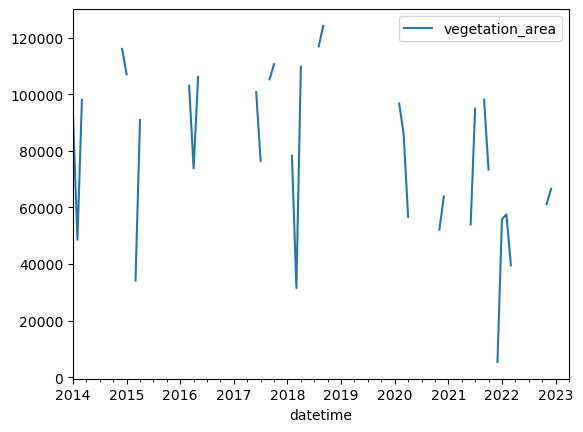

In [163]:
df_c.plot()

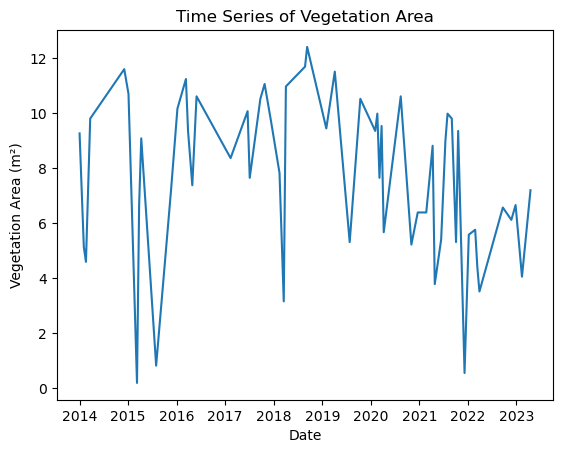

In [159]:
# Extract the dates and vegetation areas from the image collection
dates = vegetation_area_collection.aggregate_array('system:time_start')
areas = vegetation_area_collection.aggregate_array('vegetation_area')

import datetime
# Convert the lists to numpy arrays for plotting
import numpy as np
dates = np.array(ee.List(dates).getInfo())
dates = [datetime.datetime.utcfromtimestamp(date / 1000) for date in dates]
areas = np.array(ee.List(areas).getInfo())

# Plot the time series
import matplotlib.pyplot as plt
plt.plot(dates, areas/10000)
plt.xlabel('Date')
plt.ylabel('Vegetation Area (m²)')
plt.title('Time Series of Vegetation Area')
plt.show()

In [48]:
import geemap

In [69]:
img = island_info['image_collection_dict']['S2'].sort('CLOUDY_PIXEL_PERCENTAGE').first().clip(island_info['spatial_reference']['polygon'])

In [91]:
ndwi = img.normalizedDifference(['B3', 'B5']).rename('NDWI')
ndvi = img.normalizedDifference(['B5', 'B4']).rename('NDVI')
img = img.addBands(ndwi)
img = img.addBands(ndvi)
img_ndwi = img.select('NDWI')
img_ndvi = img.select('NDVI')

In [92]:
pixel_values = img_ndwi.reduceRegion(reducer=ee.Reducer.toList(), geometry=island_info['spatial_reference']['polygon'], scale=10)

In [93]:
ndwii=np.array(pixel_values.getInfo()['NDWI'])

(array([  1.,   1.,   0.,   4.,   8.,  15.,  31.,  60., 107., 143., 191.,
        303., 354., 369., 428., 364., 328., 314., 235., 227., 184., 263.,
        320., 376., 315., 184.,  53.,  26.,   9.,   2.]),
 array([-0.46964136, -0.42777506, -0.38590877, -0.34404247, -0.30217618,
        -0.26030988, -0.21844358, -0.17657729, -0.13471099, -0.0928447 ,
        -0.0509784 , -0.00911211,  0.03275419,  0.07462048,  0.11648678,
         0.15835308,  0.20021937,  0.24208567,  0.28395196,  0.32581826,
         0.36768455,  0.40955085,  0.45141714,  0.49328344,  0.53514974,
         0.57701603,  0.61888233,  0.66074862,  0.70261492,  0.74448121,
         0.78634751]),
 <BarContainer object of 30 artists>)

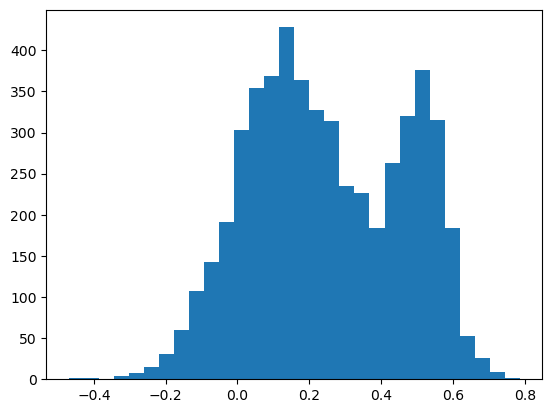

In [81]:
plt.hist(ndwii, bins=30)

In [94]:
t = threshold_multiotsu(ndwii, classes=2)
t

array([0.01455028])

In [95]:
iimg = img_ndwi.gt(t[0]).rename('land')
img = img.addBands(iimg)

In [89]:
ll = img.select('classification').reduceRegion(reducer=ee.Reducer.toList(), geometry=island_info['spatial_reference']['polygon'], scale=10)
ll = np.array(ll.getInfo()['classification'])
ll.sum() * (10**2) / 1000000

0.1693

In [90]:
m = geemap.Map(center=[island_info['spatial_reference']['latitude'], island_info['spatial_reference']['longitude']], zoom=11)
m.addLayer(img.select('classification'), vis_params={})
m

Map(center=[2.5587345, 73.10594730147102], controls=(WidgetControl(options=['position', 'transparent_bg'], wid…

(array([ 161.,  374.,  319.,  316.,  462.,  220.,  296.,  267.,  249.,
        4691.,  124.,   79.,   71.,   52.,   50.,   36.,   20.,   22.,
          47.,   65.]),
 array([-0.425051  , -0.37967012, -0.33428923, -0.28890834, -0.24352745,
        -0.19814657, -0.15276568, -0.10738479, -0.0620039 , -0.01662302,
         0.02875787,  0.07413876,  0.11951964,  0.16490053,  0.21028142,
         0.25566231,  0.30104319,  0.34642408,  0.39180497,  0.43718586,
         0.48256674]),
 <BarContainer object of 20 artists>)

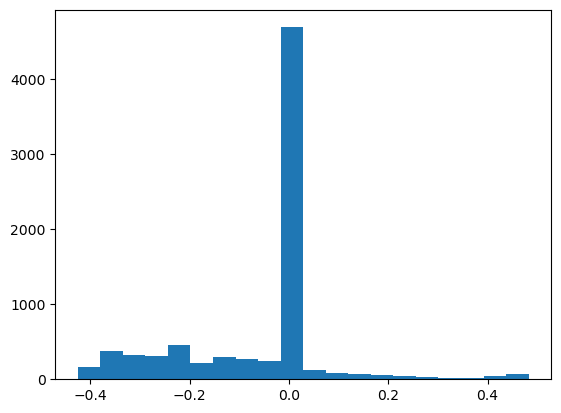

In [17]:
plt.hist(ndwii, bins=20)

In [19]:
m = geemap.Map(center=[island_info['spatial_reference']['latitude'], island_info['spatial_reference']['longitude']], zoom=11)
m.addLayer(img.select('NDVI'), vis_params={})
m

Map(center=[-0.8567663204089266, 169.5359827699445], controls=(WidgetControl(options=['position', 'transparent…

In [4]:
img = island_info['image_collection_dict']['L8'].sort('CLOUD_COVER').first()

In [2]:
import os, tifffile
path_to_images = os.path.join(os.getcwd(), 'data', 'coastsat', 'Vodamulaa_Maldives_2013_2023', 'S2', 'ms')
img = tifffile.imread(os.path.join(path_to_images, '2023-05-21-05-38-56_S2_Vodamulaa_Maldives_2013_2023_ms.tif'))
img2 = tifffile.imread(os.path.join(path_to_images, '2017-03-28-05-37-11_S2_Vodamulaa_Maldives_2013_2023_ms.tif'))

In [5]:
red = img[:,:,2]
green = img[:,:,1]
blue = img[:,:,0]
nir = img[:,:,3]

In [6]:
red2 = img2[:,:,2]
green2 = img2[:,:,1]
blue2 = img2[:,:,0]
nir2 = img2[:,:,3]

In [7]:
k = 0.5
ndvi = (nir - red) / (nir + red)
ndvi2 = (nir2 - red2) / (nir2 + red2)
ndwi = (green - nir) / (green + nir)
gndvi = (nir - green) / (nir + green)
dsbi = k * (blue - red) + (1 - k) * (blue - green)

In [9]:
idx = np.argwhere((ndvi < 0.1) | (ndvi > 1.))
#idx = np.argwhere((ndvi > 1.))
ndvi_c = ndvi.copy()
ndvi_c[idx[:, 0], idx[:, 1]] = 10.

In [7]:
idx = np.argwhere((ndvi2 < 0.1) | (ndvi2 > 1.))
#idx = np.argwhere((ndvi > 1.))
ndvi_c2 = ndvi2.copy()
ndvi_c2[idx[:, 0], idx[:, 1]] = np.nan

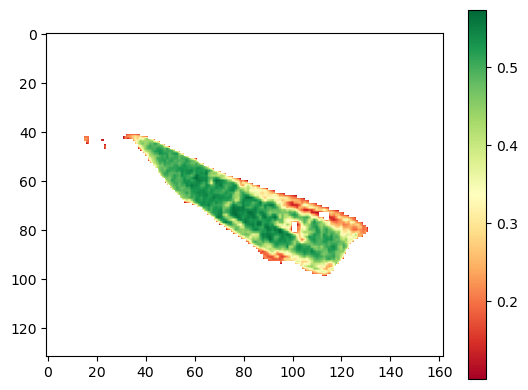

In [80]:
plt.imshow(ndvi_c2, cmap='RdYlGn')
plt.colorbar()

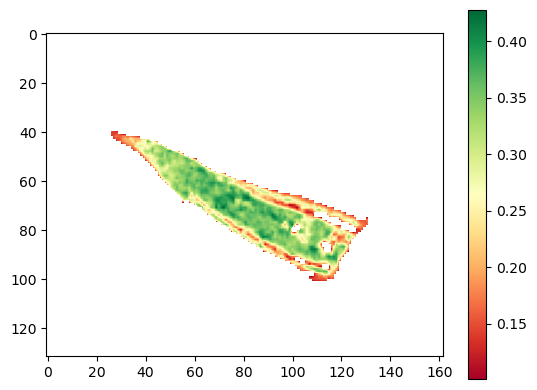

In [81]:
plt.imshow(ndvi_c, cmap='RdYlGn')
plt.colorbar()

In [22]:
idx = np.argwhere((dsbi > 40000) | (dsbi > 40000))
idx = np.argwhere(gndvi > 4)
gndvi_c = gndvi.copy()
gndvi_c[idx[:, 0], idx[:, 1]] = 5.

In [ ]:
idx = np.argwhere(dsbi > 40000)
dsbi_c = dsbi.copy()
dsbi_c[idx[:, 0], idx[:, 1]] = np.nan

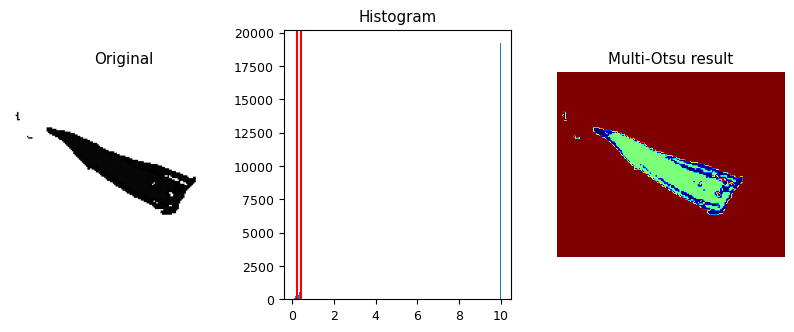

In [28]:
# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = ndvi_c
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

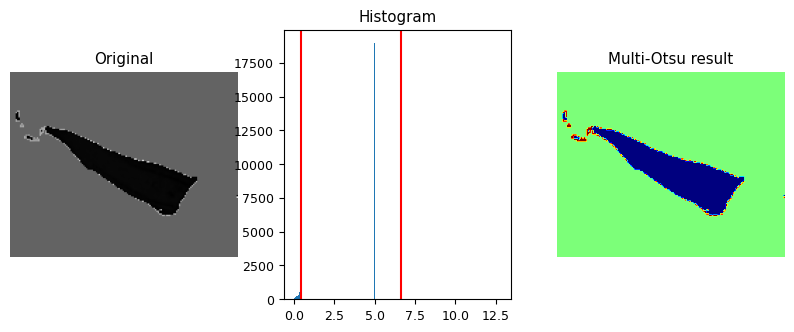

In [21]:
# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = ndvi_c
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [19]:
idx = np.argwhere(ndvi > thresholds[0])
ndvi_c = gndvi.copy()
ndvi_c[idx[:, 0], idx[:, 1]] = 5.

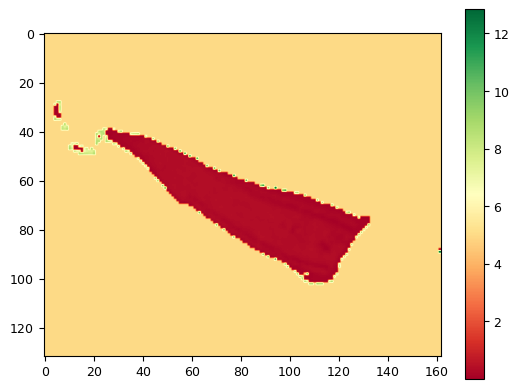

In [20]:
plt.imshow(ndvi_c, cmap='RdYlGn')
plt.colorbar()

In [2]:
from mpetools import get_OpenStreetMap_data


-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Banaba, Kiribati
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
spatial_reference
               latitude
               longitude
               polygon
               polygon_OSM
               crs
               crs_transform
               extent
               meshgrid
image_collection_dict
               description
               S2
               L7
               L8
               L9
OpenStreetMap
               gdf_roads_nodes
               gdf_roads_edges
               gdf_buildings
               coords_roads_filled
               coords_buildings_filled
               mask_roads_buildings

-------------------------------------------------------------------
RETRIEVING OpenStreetMap DATA
Island: Banaba, Kiribati
---------------------------------

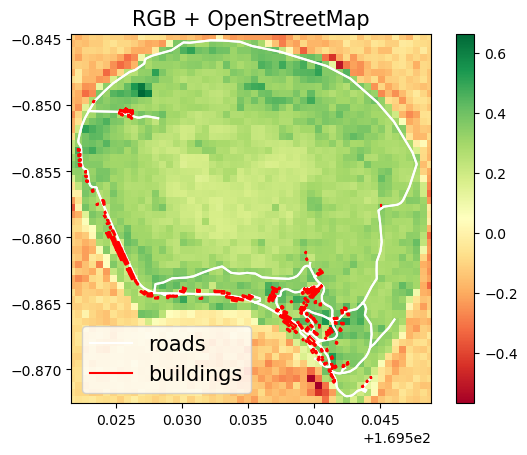

100%|██████████| 218/218 [00:06<00:00, 35.76it/s]


~ Generating OpenStreetMap mask. ~


100%|██████████| 110566/110566 [00:07<00:00, 14644.75it/s]


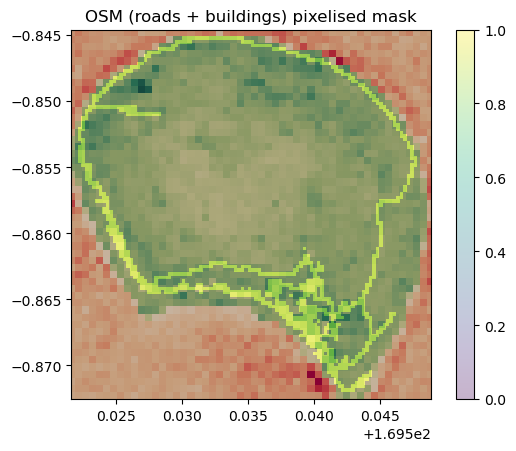

~ All information is available. ~


In [13]:
island_info = get_OpenStreetMap_data.getOpenStreetMap('Banaba', 'Kiribati')

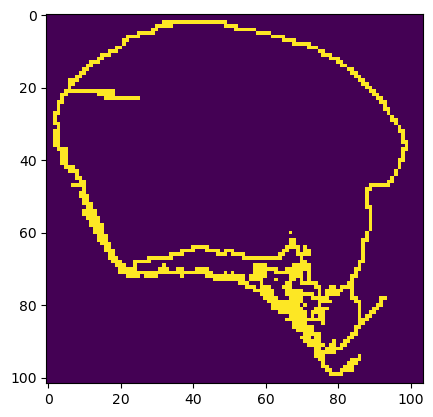

In [12]:
plt.imshow(np.flip(island_info['OpenStreetMap']['mask_roads_buildings'], axis=0))

In [51]:
np.shape(island_info['spatial_reference']['meshgrid']['meshgrid_longitude'])

(102, 104)

In [52]:
np.shape(island_info['spatial_reference']['meshgrid']['meshgrid_latitude'])

(102, 104)